In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
x = dataset.iloc[:, 3:5].values

In [5]:
from sklearn.cluster import SpectralClustering
SC = SpectralClustering(n_clusters = 5, assign_labels = 'discretize', eigen_solver = 'arpack', random_state = 0)
y_SC = SC.fit_predict(x)

C:\Anaconda\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:453: UserWarning: Exited at iteration 2000 with accuracies 
[6.55402263e-15 6.55456617e-07 9.52107302e-07 1.14709387e-06
 1.15646676e-06 1.13521305e-05]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1983 instead with accuracy 
1.486157029923459e-06.

  _, diffusion_map = lobpcg(
C:\Anaconda\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:453: UserWarning: Exited postprocessing with accuracies 
[4.00093591e-15 4.81680687e-07 9.55770022e-07 1.10289396e-06
 1.07915295e-06 5.29744542e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(


In [6]:
supervised = pd.DataFrame(dataset)

In [8]:
supervised['Cluster_group'] = y_SC

In [9]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster_group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


C:\Anaconda\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:453: UserWarning: Exited at iteration 2000 with accuracies 
[6.55402263e-15 6.55456617e-07 9.52107302e-07 1.14709387e-06
 1.15646676e-06 1.13521305e-05]
not reaching the requested tolerance 2.9802322387695312e-06.
Use iteration 1983 instead with accuracy 
1.486157029923459e-06.

  _, diffusion_map = lobpcg(
C:\Anaconda\envs\aiml\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:453: UserWarning: Exited postprocessing with accuracies 
[4.00093591e-15 4.81680687e-07 9.55770022e-07 1.10289396e-06
 1.07915295e-06 5.29744542e-06]
not reaching the requested tolerance 2.9802322387695312e-06.
  _, diffusion_map = lobpcg(


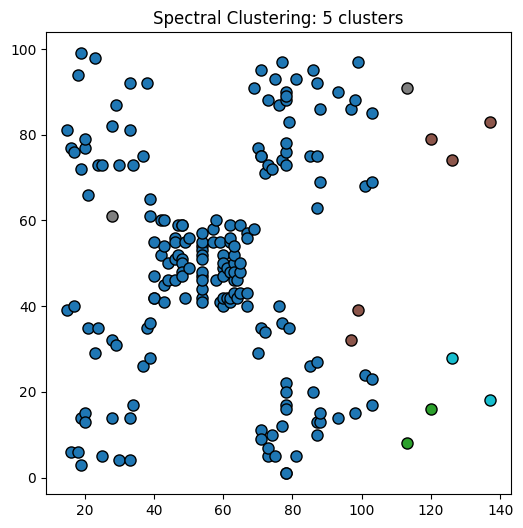

In [10]:
SC = SpectralClustering(
    n_clusters=5,
    assign_labels='discretize',
    eigen_solver='arpack',
    random_state=0
)
y_SC = SC.fit_predict(x)

# Plot
plt.figure(figsize=(6,6))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(y_SC))))

for k, col in zip(set(y_SC), colors):
    class_member_mask = (y_SC == k)
    xy = x[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o',
             markerfacecolor=tuple(col),
             markeredgecolor='k',
             markersize=8)

plt.title(f"Spectral Clustering: {len(set(y_SC))} clusters")
plt.show()
